## Import necessary libraries


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Extract csv file

In [37]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


## Check Data Types

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


# Numerical
**1) lease_commence_date** <br>
**2) floor_area_sqm**

# Categorical
**1) month** <br>
**2) town** <br>
**3) flat_type** <br>
**4) block --> does not show anything** <br>
**5) street_name** <br>
**6) storey_range** <br>
**7) flat_model**


### Will explore the other 6 categorical data on resale_price apart from block
### block does not provide any valuable information given how there can be repeated blocks but at different areas and different flat types. This means that block is not unique and is not able to provide good analysis on resale_price

# Extract Numerical Data Type

In [39]:
NumData = pd.DataFrame(data[['floor_area_sqm', 'lease_commence_date','resale_price']])
NumData.head()

,floor_area_sqm,lease_commence_date,resale_price
0,69.0,1986,147000.0
1,61.0,1986,144000.0
2,73.0,1976,159000.0
3,73.0,1976,167000.0
4,67.0,1976,163000.0


In [40]:
NumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       369651 non-null  float64
 1   lease_commence_date  369651 non-null  int64  
 2   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 8.5 MB


## Check for outliers and remove them

In [41]:
NumDataCleaned = data[['floor_area_sqm', 'resale_price', 'lease_commence_date']].copy()
# Make a clean "copy" and not just a slice of the dataset

floor_area_sqm          595
resale_price           5432
lease_commence_date       0
dtype: int64

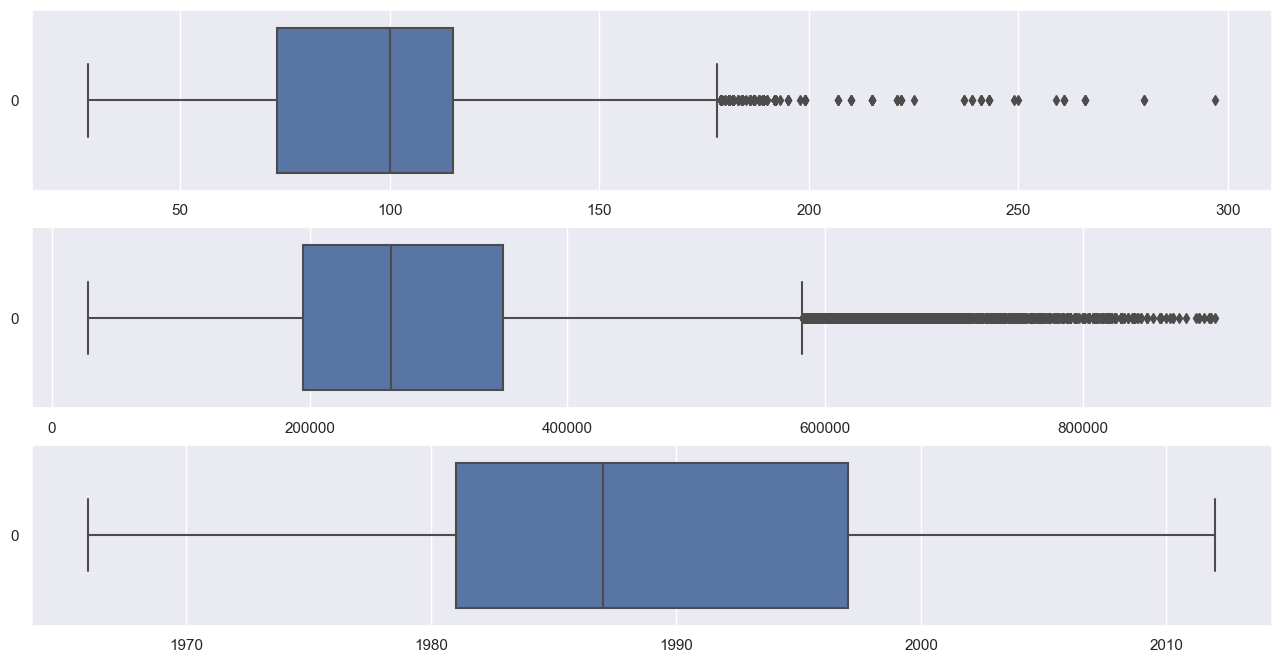

In [42]:
# Draw the boxplots
f, axes = plt.subplots(3, 1, figsize=(16, 8))

sb.boxplot(data = NumDataCleaned["floor_area_sqm"], orient = "h", ax = axes[0])
sb.boxplot(data = NumDataCleaned["resale_price"], orient = "h", ax = axes[1])
sb.boxplot(data = NumDataCleaned["lease_commence_date"], orient = "h", ax = axes[2])

# Calculate the quartiles
Q1 = NumDataCleaned.quantile(0.25)
Q3 = NumDataCleaned.quantile(0.75)

# Rule to identify outliers
rule = ((NumDataCleaned < (Q1 - 1.5 * (Q3 - Q1))) | (NumDataCleaned > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [43]:
# Calculate the quartiles
Q1 = NumDataCleaned.quantile(0.25)
Q3 = NumDataCleaned.quantile(0.75)

# Rule to identify outliers
rule = ((NumDataCleaned < (Q1 - 1.5 * (Q3 - Q1))) | (NumDataCleaned > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,floor_area_sqm,resale_price,lease_commence_date
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
369646,False,False,False
369647,False,False,False
369648,False,False,False
369649,True,True,False


In [44]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
369646    False
369647    False
369648    False
369649     True
369650     True
Length: 369651, dtype: bool

In [45]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    363711
True       5940
Name: count, dtype: int64

In [46]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]

# Remove the outliers based on the row indices obtained above
NumDataCleaned.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
NumDataCleaned

,floor_area_sqm,resale_price,lease_commence_date
0,69.0,147000.0,1986
1,61.0,144000.0,1986
2,73.0,159000.0,1976
3,73.0,167000.0,1976
4,67.0,163000.0,1976
...,...,...,...
369644,121.0,465000.0,1985
369645,121.0,503000.0,1985
369646,121.0,476888.0,1985
369647,122.0,490000.0,1986


# Extract Categorical Data Type

In [72]:
CatData = pd.DataFrame(data[['month', 'town', 'flat_type', 'street_name', 'storey_range', 'flat_model']])
CatData.head()

,month,town,flat_type,street_name,storey_range,flat_model
0,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,Improved
1,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,04 TO 06,Improved
2,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation
3,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation
4,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation


In [73]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   month         369651 non-null  object
 1   town          369651 non-null  object
 2   flat_type     369651 non-null  object
 3   street_name   369651 non-null  object
 4   storey_range  369651 non-null  object
 5   flat_model    369651 non-null  object
dtypes: object(6)
memory usage: 16.9+ MB


In [74]:
CatData = CatData.astype('category')

In [75]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   month         369651 non-null  category
 1   town          369651 non-null  category
 2   flat_type     369651 non-null  category
 3   street_name   369651 non-null  category
 4   storey_range  369651 non-null  category
 5   flat_model    369651 non-null  category
dtypes: category(6)
memory usage: 2.8 MB


In [76]:
CatData = pd.concat([CatData, data["resale_price"]], axis = 1).reindex(CatData.index)
CatData.head()

,month,town,flat_type,street_name,storey_range,flat_model,resale_price
0,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,Improved,147000.0
1,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,04 TO 06,Improved,144000.0
2,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation,159000.0
3,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation,167000.0
4,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,New Generation,163000.0


# Check the effect of the Categorical Variables on SalePrice


## Town

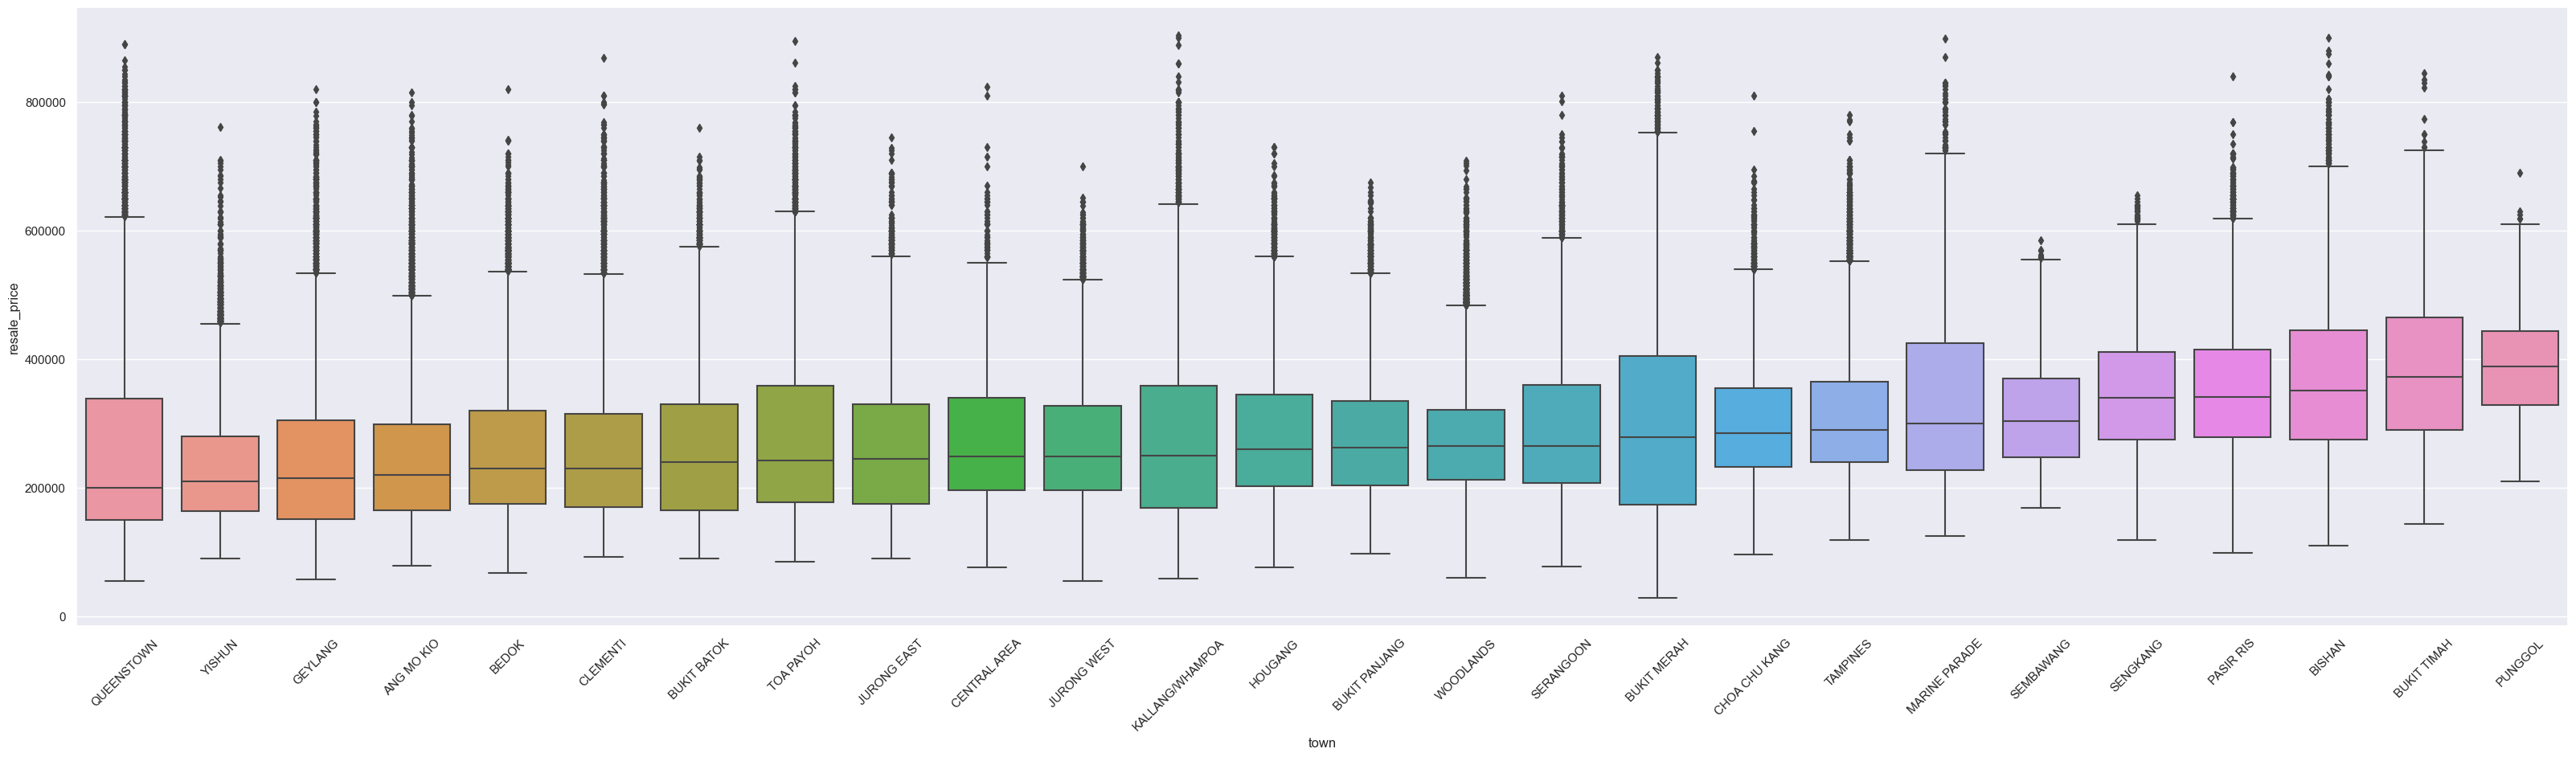

In [77]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'town', y = 'resale_price', data = CatData,
           order = CatData.groupby('town')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## Month

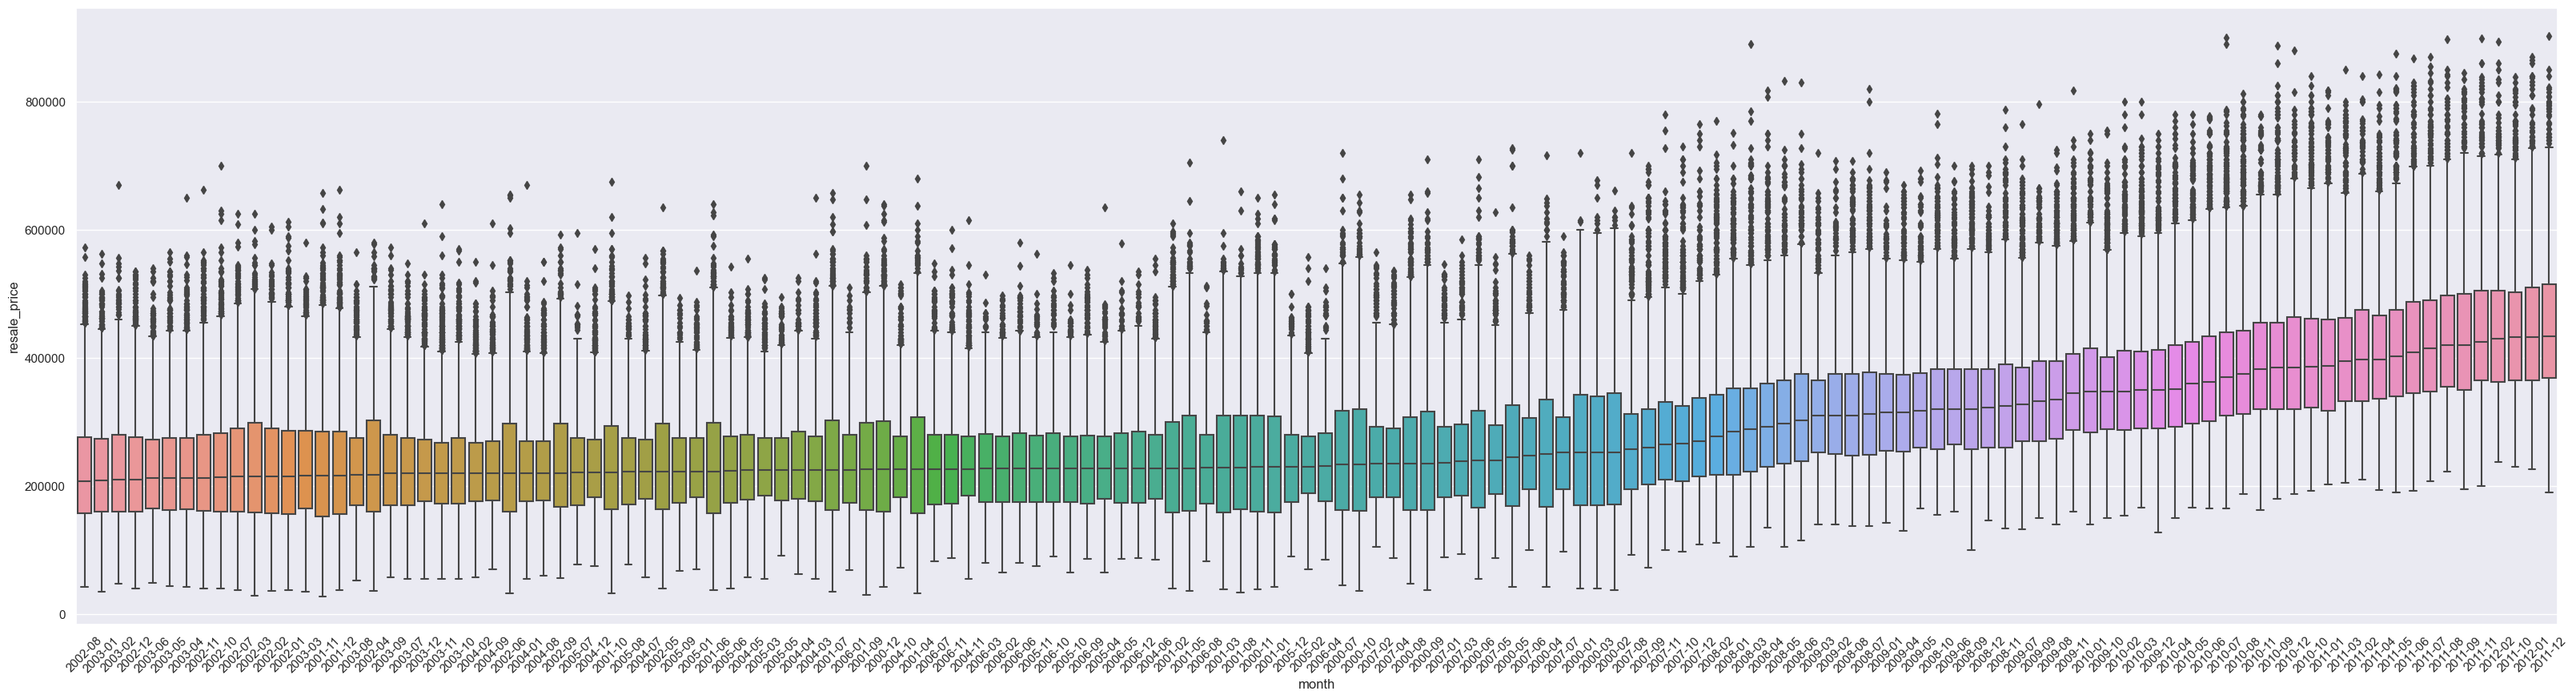

In [78]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'month', y = 'resale_price', data = CatData,
           order = CatData.groupby('month')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## street_name

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

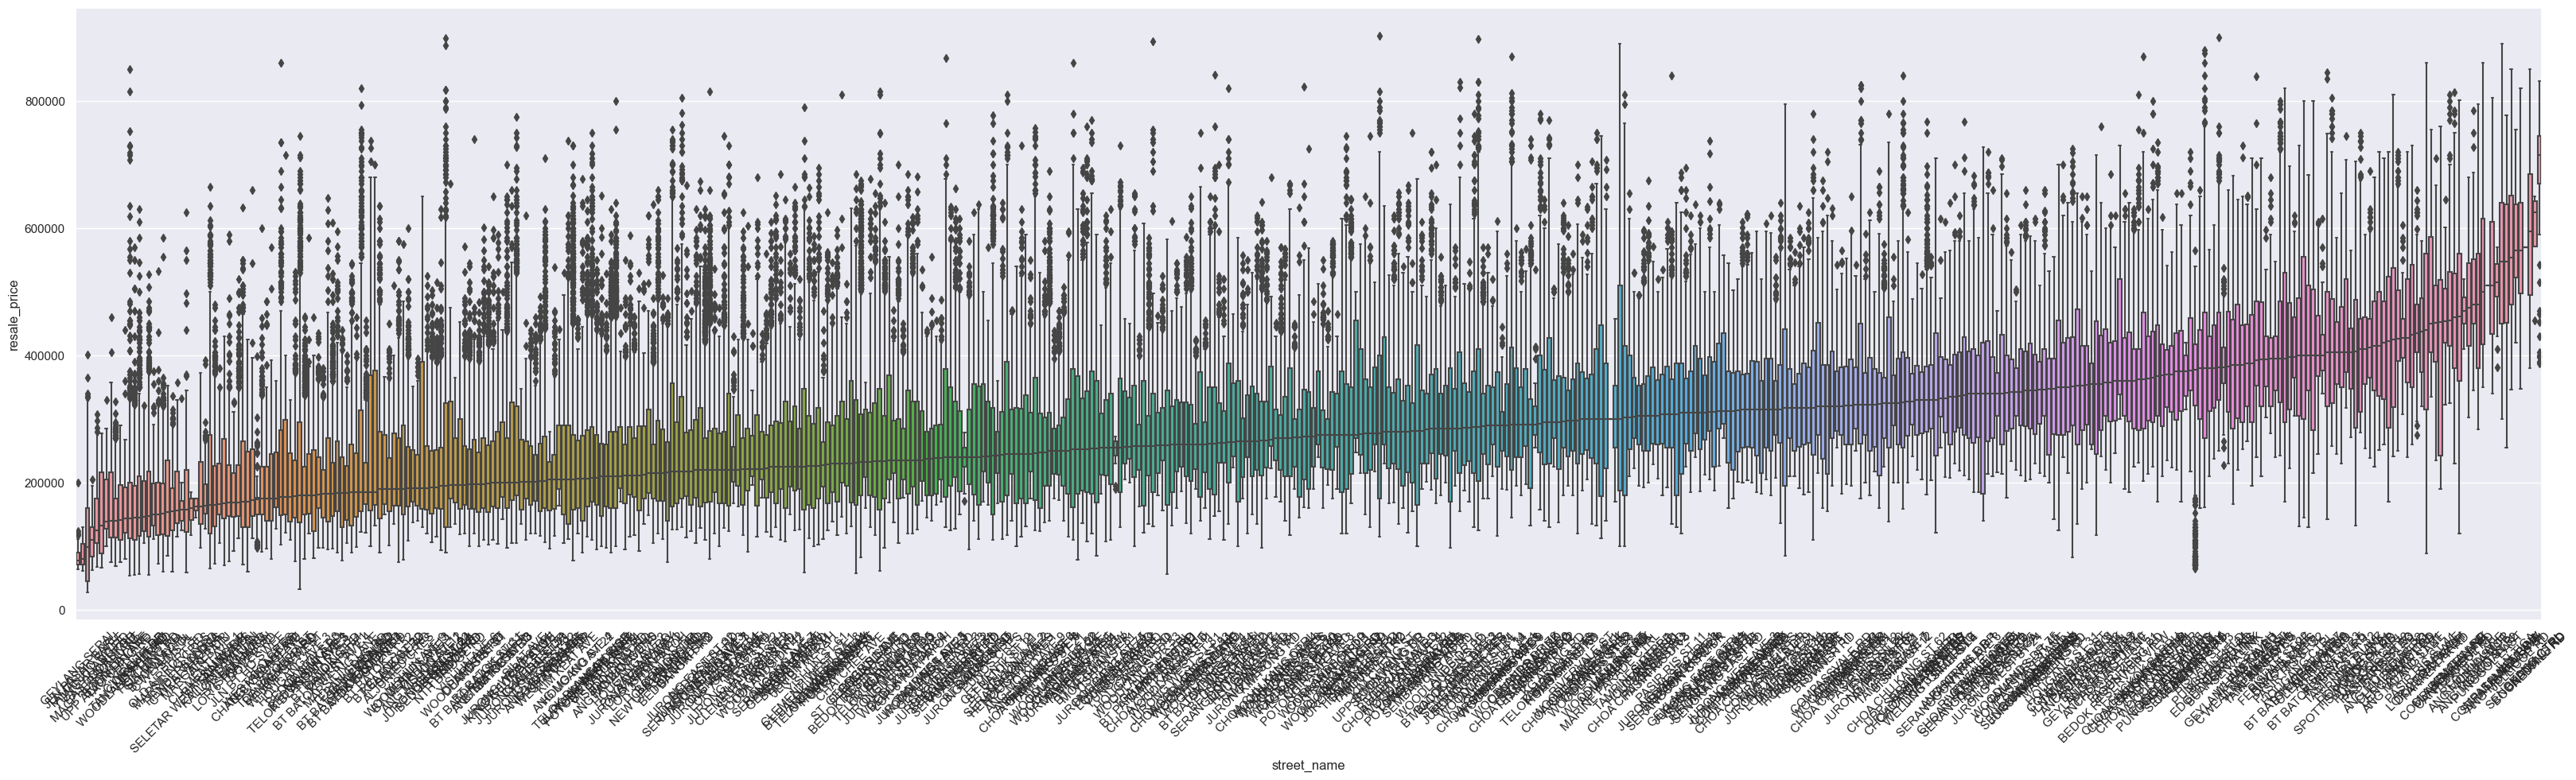

In [79]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'street_name', y = 'resale_price', data = CatData,
           order = CatData.groupby('street_name')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45)

## flat_type

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1 ROOM'),
  Text(1, 0, '2 ROOM'),
  Text(2, 0, '3 ROOM'),
  Text(3, 0, '4 ROOM'),
  Text(4, 0, '5 ROOM'),
  Text(5, 0, 'EXECUTIVE'),
  Text(6, 0, 'MULTI-GENERATION')])

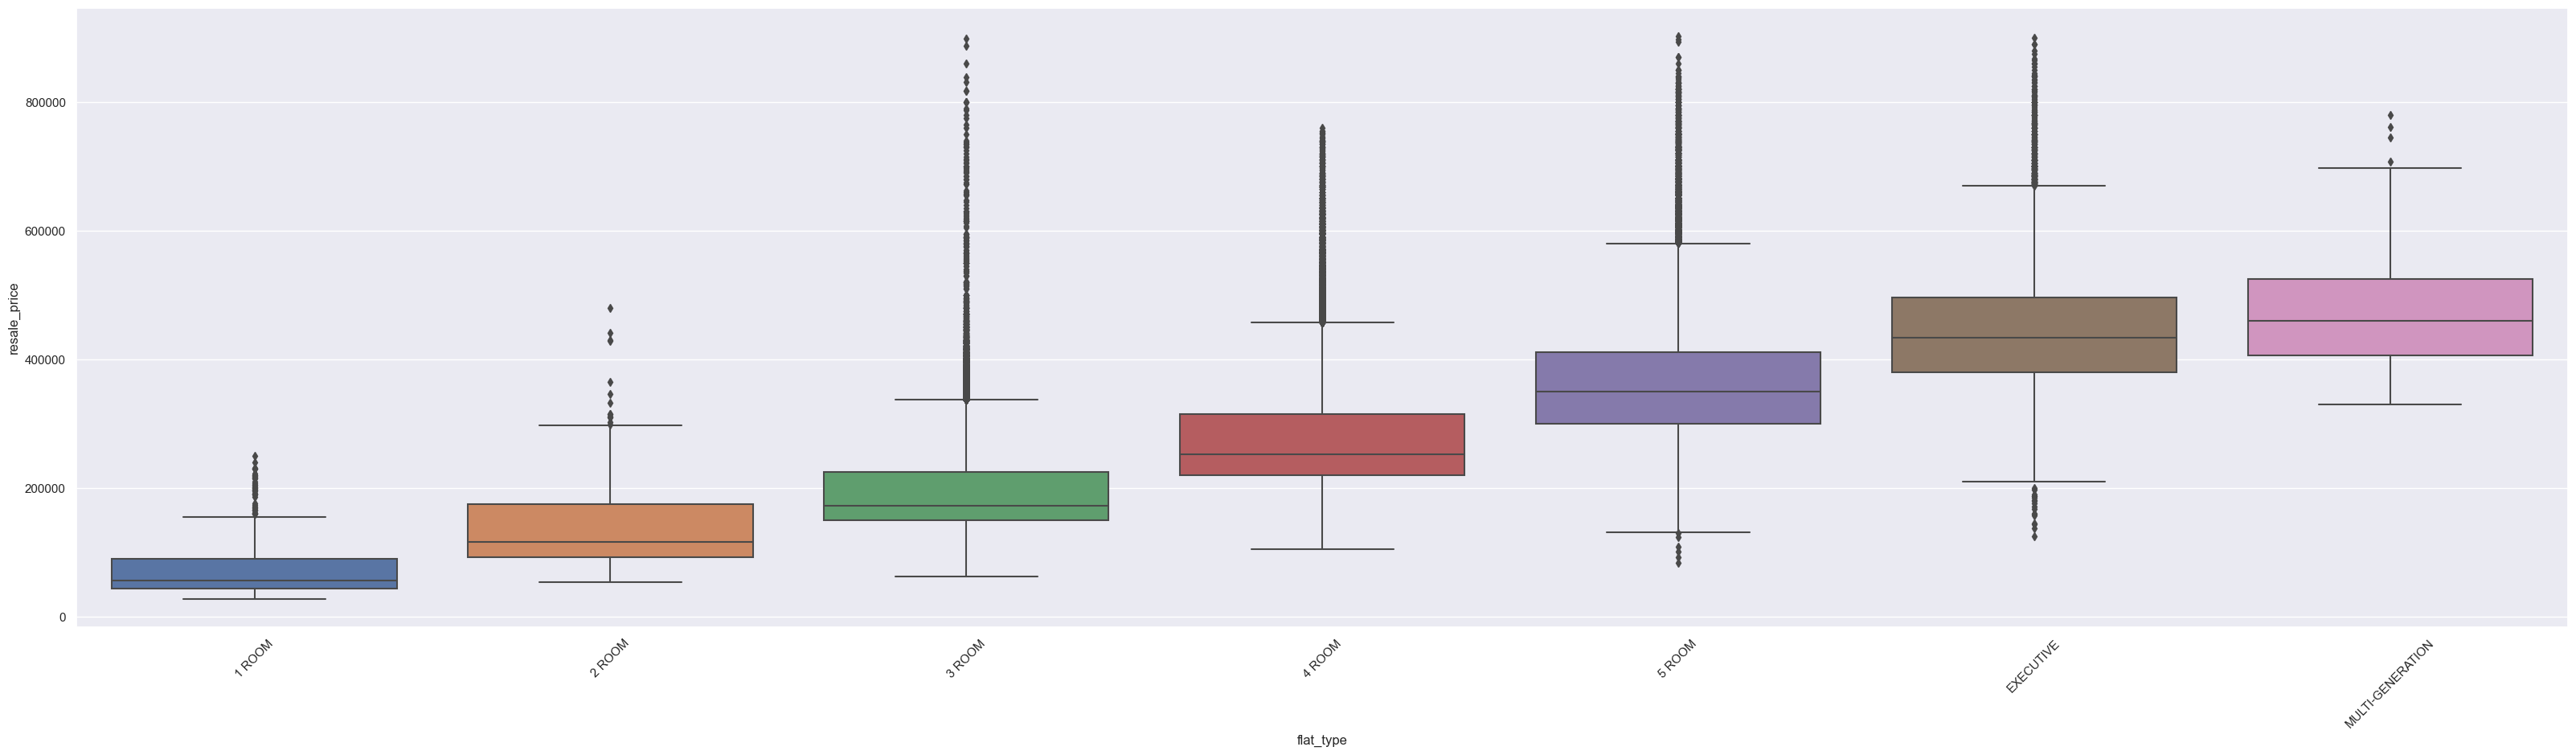

In [80]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'flat_type', y = 'resale_price', data = CatData,
           order = CatData.groupby('flat_type')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45)

## flat_model

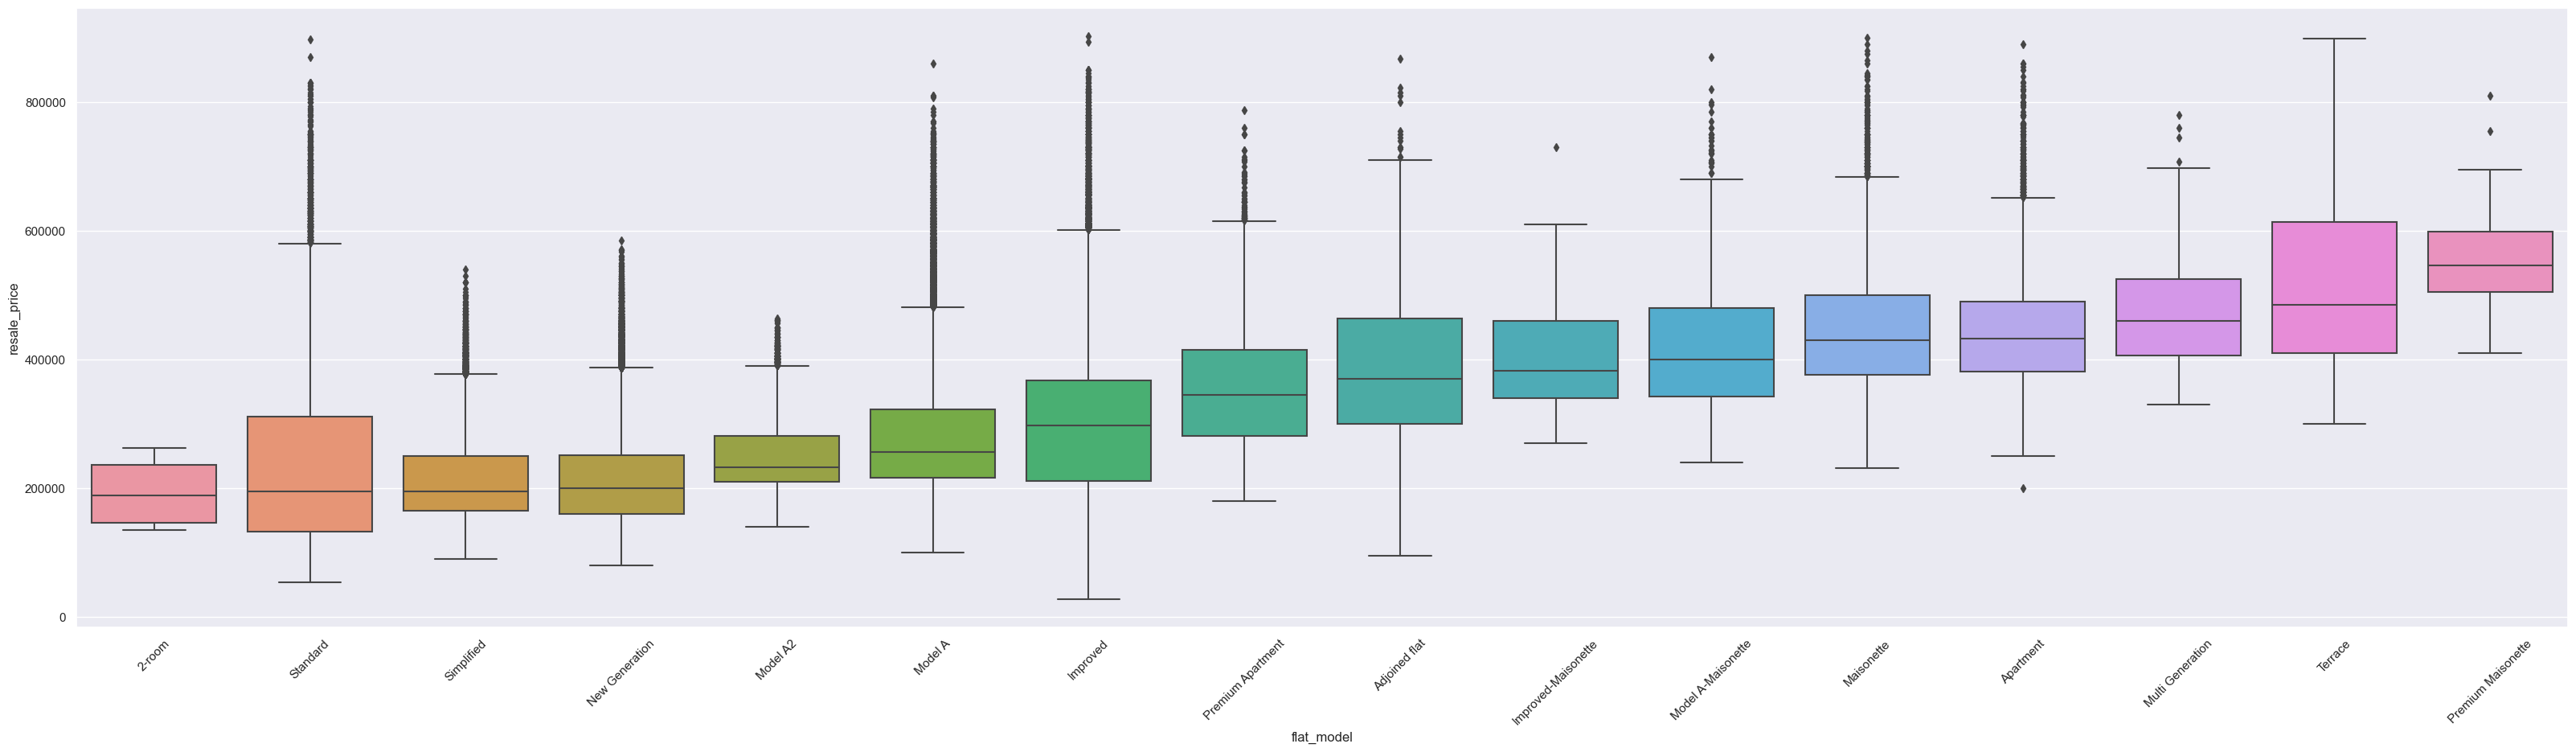

In [56]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'flat_model', y = 'resale_price', data = CatData,
           order = CatData.groupby('flat_model')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## storey_range

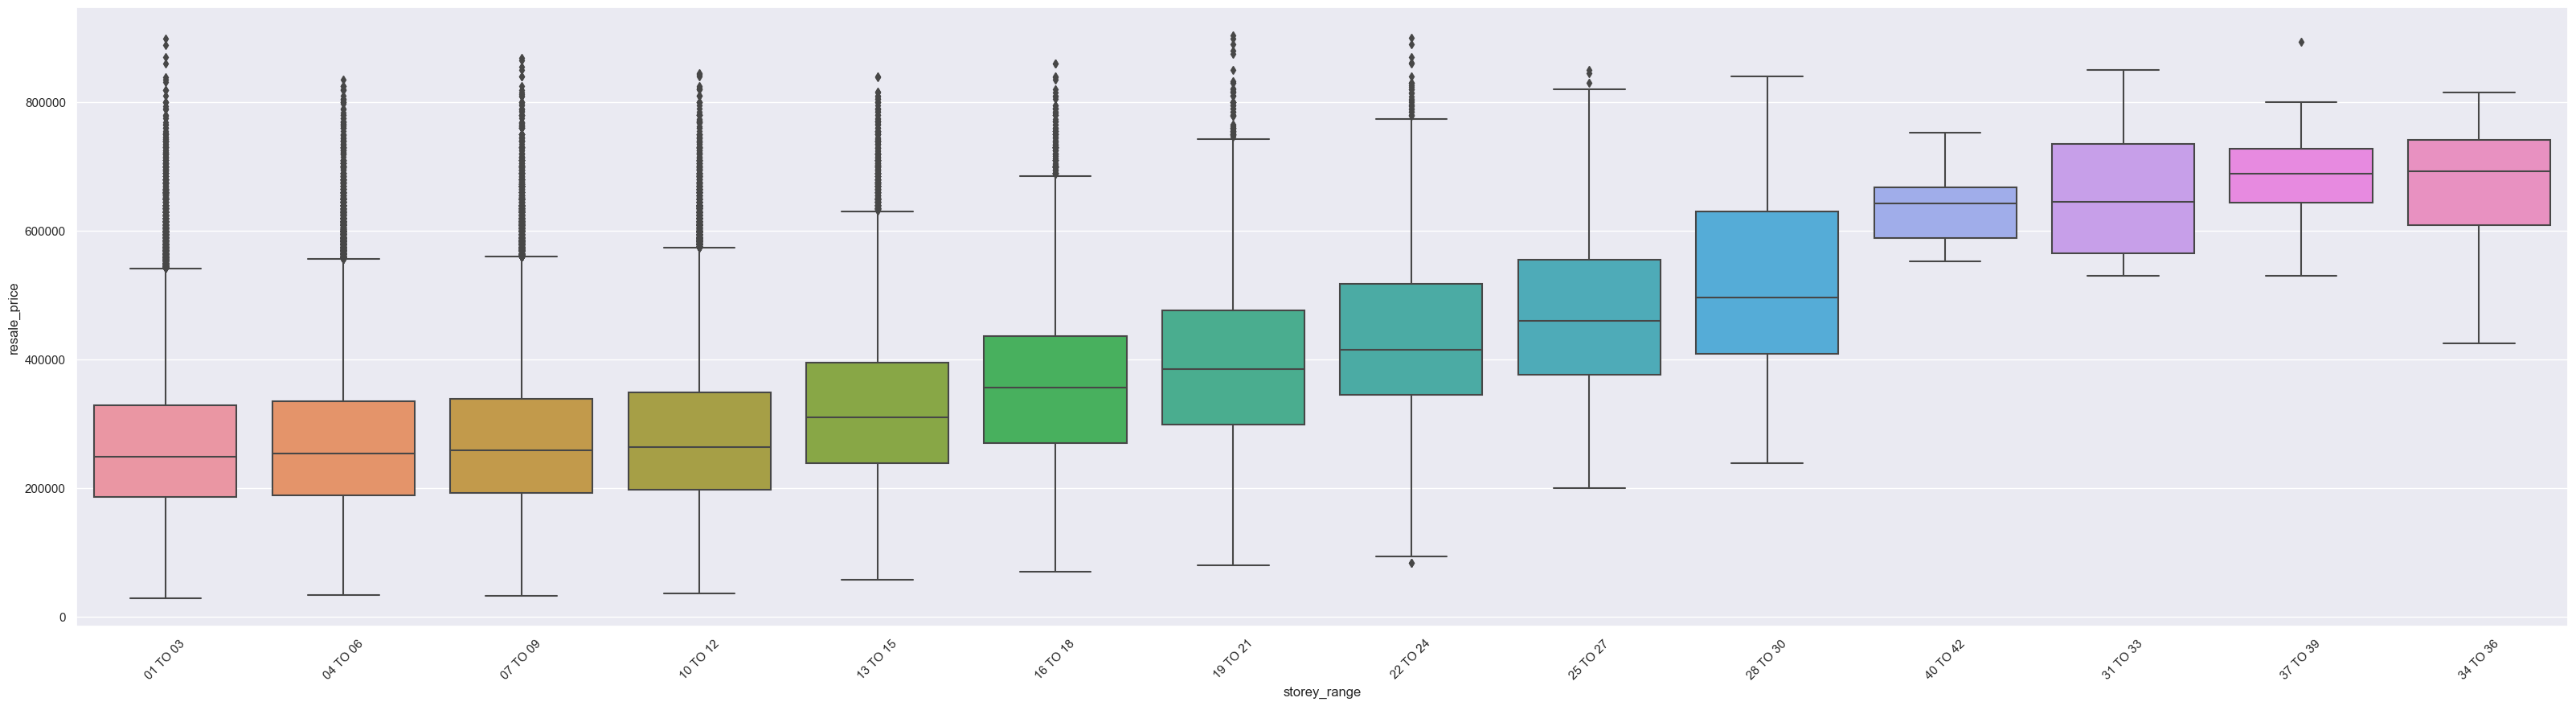

In [57]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(40, 10))
sb.boxplot(x = 'storey_range', y = 'resale_price', data = CatData,
           order = CatData.groupby('storey_range')['resale_price'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## Analysis of Categorical Variales 

> `flat_type`  and `storey_range` and `flat_model` : Seems to be important variables : Significant variation in `resale_price` boxplots across levels   
> `town` : Not clear if important as a variable at all : Not much variation in `resale_price` boxplots across the categorical levels   
> `month` and `street_name` : Not feasible as there are too many levels in the variable to predict `resale_price`

From the above information, `flat_type` and `storey_range` and `flat_model` as the more important predictors, while filtering out `town` , `month` and `street_name` in our analysis


# Perform Mapping Of the 3 categorical predictors

In [58]:
flat_type = pd.DataFrame(data[['flat_type']])
mapping = {'1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7}
data['flat_type_num'] = flat_type['flat_type'].map(mapping)

storey_range = pd.DataFrame(data[['storey_range']])
mapping = {'01 TO 03': 2, '04 TO 06': 5, '07 TO 09': 8, '10 TO 12': 11, '13 TO 15': 14, '16 TO 18': 17, '19 TO 21': 20, '22 TO 24': 23, '25 TO 27': 26, '28 TO 30': 29, '31 TO 33': 32, '34 TO 36': 35, '37 TO 39': 38, '40 TO 42': 41}
data['Story_range_num'] = storey_range["storey_range"].map(mapping)

flat_model = pd.DataFrame(data[['flat_model']])
mapping = {'2-room': 1, 'Adjoined flat': 2, 'Apartment': 3, 'Improved': 4, 'Improved-Maisonette': 5, 'Maisonette': 6, 'Model A': 7, 'Model A-Maisonette': 8, 'Model A2': 9, 'Multi Generation': 10, 'New Generation': 11, 'Premium Apartment': 12, 'Premium Maisonette': 13, 'Simplified': 14, 'Standard': 15, 'Terrace': 16}
data['flat_model_num'] = flat_model['flat_model'].map(mapping)

## Extract the 3 categorical data after encoding it to levels and combine with resale_price

In [59]:
CatData = pd.DataFrame(data[['flat_type_num', 'Story_range_num','flat_model_num','resale_price']])
CatData.head()

,flat_type_num,Story_range_num,flat_model_num,resale_price
0,3,8,4,147000.0
1,3,5,4,144000.0
2,3,8,11,159000.0
3,3,8,11,167000.0
4,3,8,11,163000.0


In [60]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flat_type_num    369651 non-null  int64  
 1   Story_range_num  369651 non-null  int64  
 2   flat_model_num   369651 non-null  int64  
 3   resale_price     369651 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 11.3 MB


## Check for outliers and remove them

In [61]:
CatDataCleaned = CatData[['flat_type_num', 'Story_range_num', 'flat_model_num','resale_price']].copy()
# Make a clean "copy" and not just a slice of the dataset

<Axes: >

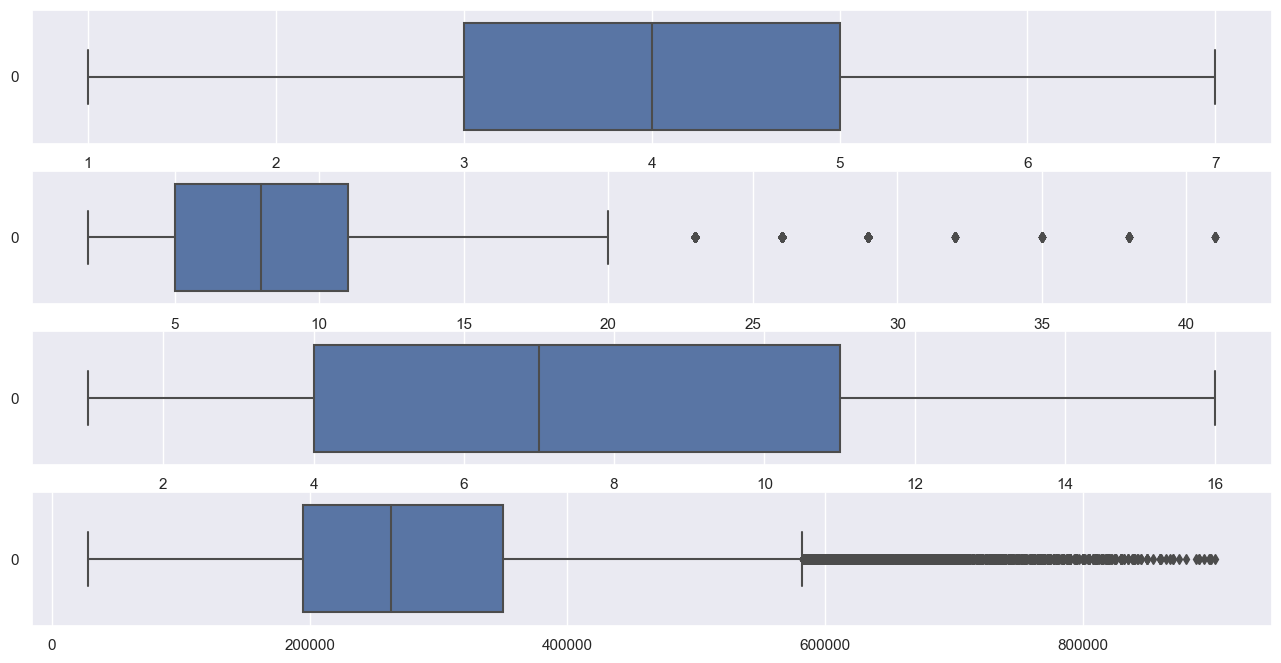

In [62]:
# Draw the boxplots
f, axes = plt.subplots(4, 1, figsize=(16, 8))

sb.boxplot(data = CatDataCleaned["flat_type_num"], orient = "h", ax = axes[0])
sb.boxplot(data = CatDataCleaned["Story_range_num"], orient = "h", ax = axes[1])
sb.boxplot(data = CatDataCleaned["flat_model_num"], orient = "h", ax = axes[2])
sb.boxplot(data = CatDataCleaned["resale_price"], orient = "h", ax = axes[3])

In [63]:
# Calculate the quartiles
Q1 = CatDataCleaned.quantile(0.25)
Q3 = CatDataCleaned.quantile(0.75)

# Rule to identify outliers
rule = ((CatDataCleaned < (Q1 - 1.5 * (Q3 - Q1))) | (CatDataCleaned > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
369646    False
369647    False
369648    False
369649     True
369650     True
Length: 369651, dtype: bool

In [64]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    360927
True       8724
Name: count, dtype: int64

In [65]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]

# Remove the outliers based on the row indices obtained above
CatDataCleaned.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
CatDataCleaned

,flat_type_num,Story_range_num,flat_model_num,resale_price
0,3,8,4,147000.0
1,3,5,4,144000.0
2,3,8,11,159000.0
3,3,8,11,167000.0
4,3,8,11,163000.0
...,...,...,...,...
369644,5,11,4,465000.0
369645,5,5,4,503000.0
369646,5,11,4,476888.0
369647,5,2,4,490000.0


In [66]:
CatDataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360927 entries, 0 to 369648
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flat_type_num    360927 non-null  int64  
 1   Story_range_num  360927 non-null  int64  
 2   flat_model_num   360927 non-null  int64  
 3   resale_price     360927 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 13.8 MB


# Final Data Prep
**Numerical in `NumData`--> with outliers** <br>
**Numerical in `NumDataCleaned` --> without outliers** <br>
**Categorical in `CatData` --> with outliers**<br>
**Categorical in `CatDataCleaned` --> without outliers**<br>

In [67]:
NumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       369651 non-null  float64
 1   lease_commence_date  369651 non-null  int64  
 2   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 8.5 MB


In [68]:
NumDataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363711 entries, 0 to 369648
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       363711 non-null  float64
 1   resale_price         363711 non-null  float64
 2   lease_commence_date  363711 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 11.1 MB


In [69]:
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flat_type_num    369651 non-null  int64  
 1   Story_range_num  369651 non-null  int64  
 2   flat_model_num   369651 non-null  int64  
 3   resale_price     369651 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 11.3 MB


In [ ]:
CatDataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360927 entries, 0 to 369648
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flat_type_num    360927 non-null  int64  
 1   Story_range_num  360927 non-null  int64  
 2   flat_model_num   360927 non-null  int64  
 3   resale_price     360927 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 13.8 MB


# We will perform analysis on these dataframes in the next few notebooks